# Exercise 4 : Linear Regression

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [5]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Problem 1 : Predicting SalePrice using GrLivArea

Extract the required variables from the dataset, as mentioned in the problem.     

In [6]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

Plot `houseSalePrice` against `houseGrLivArea` using standard JointPlot.

### 1a) Plot houseSalePrice against houseGrLivArea using standard jointplot, and note the strong linear relationship.


**Remember the correlation coefficient between these two variables from the last Example Class? Check again.**

In the last example GrLivArea : Possibly the most important variable : Highest Correlation, Strong Linearity

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


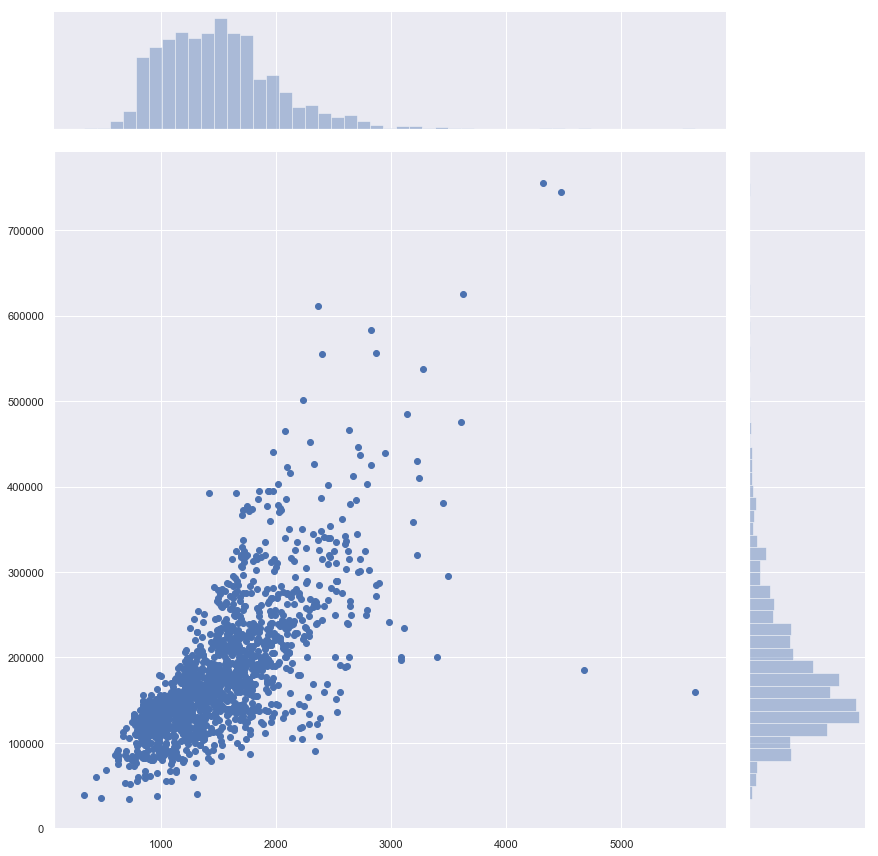

In [7]:
sb.jointplot(houseGrLivArea, houseSalePrice, height = 12)


### 1b) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression
Import the `LinearRegression` model from `sklearn.linear_model`.

In [8]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

### 1c)Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.
Train datasets : houseGrLivArea_train and houseSalePrice_train (check both have 1100 rows)
Test datasets : houseGrLivArea_test and houseSalePrice_test (check both have 360 rows)

Prepare both the datasets by splitting in Train and Test sets.   
Train Set with 1100 samples and Test Set with 360 samples.

In [9]:
# Split the dataset into Train and Test       
houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])
houseGrLivArea_test  = pd.DataFrame(houseGrLivArea[-360:])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Check the sample sizes
print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGrLivArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


### 1d) Training : Fit a Linear Regression model with X = houseGrLivArea_train and y = houseSalePrice_train

Fit Linear Regression model on `houseGrLivArea_train` and `houseSalePrice_train`

In [10]:
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 1e) Print the coefficients of the Linear Regression model you just fit, and plot the Regression line on a Scatterplot of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.
#### Visual Representation of the Linear Regression Model

Check the coefficients of the Linear Regression model you just fit.

In [11]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


**1e)Plot the regression line based on the coefficients-intercept form.**

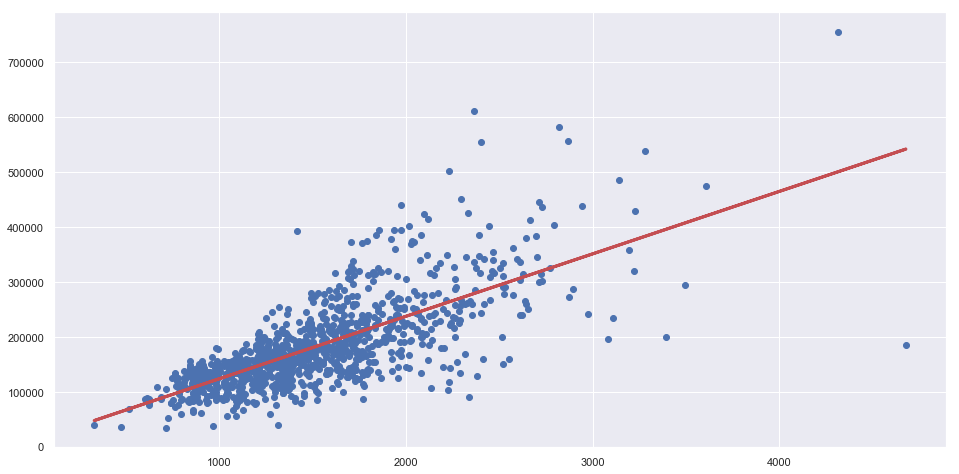

In [12]:
# Formula for the Regression line
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()


### 1f) Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.
#### Prediction of Response based on the Predictor

Predict `SalePrice` given `GrLivArea` in the Test dataset.

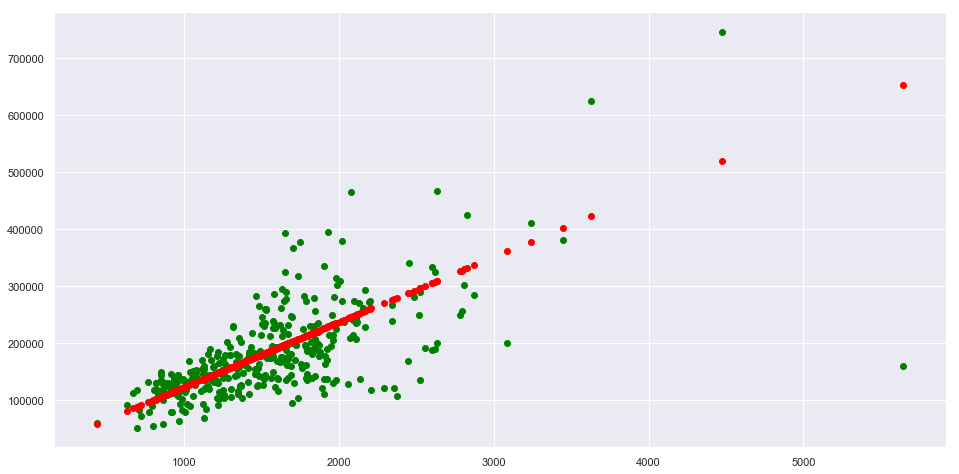

In [13]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

Check how good the predictions are on the Train Set.    
Metric : Explained Variance or R^2 on the Train Set.

In [21]:
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSalePrice_train, houseSalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5317704755454566


ValueError: operands could not be broadcast together with shapes (1100,1) (360,1) 

### 1g) Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.
http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis
What Is Goodness-of-Fit for a Linear Model?
Illustration of regression residuals Definition: Residual = Observed value - Fitted value
Linear regression calculates an equation that minimizes the distance between the fitted line and all of the data points. Technically, ordinary least squares (OLS) regression minimizes the sum of the squared residuals.

In general, a model fits the data well if the differences between the observed values and the model's predicted values are small and unbiased.

Before you look at the statistical measures for goodness-of-fit, you should check the residual plots. Residual plots can reveal unwanted residual patterns that indicate biased results more effectively than numbers. When your residual plots pass muster, you can trust your numerical results and check the goodness-of-fit statistics.


Check how good the predictions are on the Test Set.    
Metric : Explained Variance or R^2 on the Test Set.

In [ ]:
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))

#### You should also try the following

* Convert `SalePrice` to `log(SalePrice)` in the beginning and then use it for Regression     
  Code : `houseSalePrice = pd.DataFrame(np.log(houseData['SalePrice']))`    
  
* Perform a *Random Train-Test Split* on the dataset before you start with the Regression      
  Note : Check the preparation notebook `M3 LinearRegression.ipynb` for the code

---

## Problem 2 : Predicting SalePrice using LotArea

Extract the required variables from the dataset, as mentioned in the problem.     

In [ ]:
housePredictor = pd.DataFrame(houseData['LotArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
sb.jointplot(housePredictor, houseSalePrice, height = 12)

#### Linear Regression on SalePrice vs Predictor

In [ ]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Split the dataset into Train and Test       
housePredictor_train = pd.DataFrame(housePredictor[:1100])
housePredictor_test  = pd.DataFrame(housePredictor[-360:])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(housePredictor_train, houseSalePrice_train)

#### Visual Representation of the Linear Regression Model

In [ ]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = housePredictor_train
regline_y = linreg.intercept_ + linreg.coef_ * housePredictor_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Prediction of Response based on the Predictor

In [ ]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_test_pred = linreg.predict(housePredictor_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_test, houseSalePrice_test, color = "green")
plt.scatter(housePredictor_test, houseSalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(housePredictor_train, houseSalePrice_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(housePredictor_test, houseSalePrice_test))

---

## Problem 2 : Predicting SalePrice using TotalBsmtSF

Extract the required variables from the dataset, as mentioned in the problem.     

In [ ]:
housePredictor = pd.DataFrame(houseData['TotalBsmtSF'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
sb.jointplot(housePredictor, houseSalePrice, height = 12)

#### Linear Regression on SalePrice vs Predictor

In [ ]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Split the dataset into Train and Test       
housePredictor_train = pd.DataFrame(housePredictor[:1100])
housePredictor_test  = pd.DataFrame(housePredictor[-360:])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(housePredictor_train, houseSalePrice_train)

#### Visual Representation of the Linear Regression Model

In [ ]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = housePredictor_train
regline_y = linreg.intercept_ + linreg.coef_ * housePredictor_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Prediction of Response based on the Predictor

In [ ]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_test_pred = linreg.predict(housePredictor_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_test, houseSalePrice_test, color = "green")
plt.scatter(housePredictor_test, houseSalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(housePredictor_train, houseSalePrice_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(housePredictor_test, houseSalePrice_test))

---

## Problem 2 : Predicting SalePrice using GarageArea

Extract the required variables from the dataset, as mentioned in the problem.     

In [ ]:
housePredictor = pd.DataFrame(houseData['GarageArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
sb.jointplot(housePredictor, houseSalePrice, height = 12)

#### Linear Regression on SalePrice vs Predictor

In [ ]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Split the dataset into Train and Test       
housePredictor_train = pd.DataFrame(housePredictor[:1100])
housePredictor_test  = pd.DataFrame(housePredictor[-360:])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(housePredictor_train, houseSalePrice_train)

#### Visual Representation of the Linear Regression Model

In [ ]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = housePredictor_train
regline_y = linreg.intercept_ + linreg.coef_ * housePredictor_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Prediction of Response based on the Predictor

In [ ]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_test_pred = linreg.predict(housePredictor_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(housePredictor_test, houseSalePrice_test, color = "green")
plt.scatter(housePredictor_test, houseSalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(housePredictor_train, houseSalePrice_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(housePredictor_test, houseSalePrice_test))

---

## Extra : Predicting SalePrice using Multiple Variables

Extract the required variables from the dataset, and then perform Multi-Variate Regression.     

In [ ]:
housePredictor = pd.DataFrame(houseData[['GrLivArea','LotArea','TotalBsmtSF','GarageArea']])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

#### Linear Regression on SalePrice vs Predictor

In [ ]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Split the dataset into Train and Test       
housePredictor_train = pd.DataFrame(housePredictor[:1100])
housePredictor_test  = pd.DataFrame(housePredictor[-360:])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
houseSalePrice_test  = pd.DataFrame(houseSalePrice[-360:])

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(housePredictor_train, houseSalePrice_train)

#### Coefficients of the Linear Regression Model

Note that you CANNOT visualize the model as a line on a 2D plot, as it is a multi-dimensional surface.

In [ ]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

#### Prediction of Response based on the Predictor

In [ ]:
# Predict SalePrice values corresponding to GrLivArea
houseSalePrice_train_pred = linreg.predict(housePredictor_train)
houseSalePrice_test_pred = linreg.predict(housePredictor_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(houseSalePrice_train, houseSalePrice_train_pred, color = "blue")
axes[0].plot(houseSalePrice_train, houseSalePrice_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(houseSalePrice_test, houseSalePrice_test_pred, color = "green")
axes[1].plot(houseSalePrice_test, houseSalePrice_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [ ]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(housePredictor_train, houseSalePrice_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(housePredictor_test, houseSalePrice_test))

---

## Interpretation and Discussion

Now that you have performed Linear Regression of `SalePrice` against the four variables `GrLivArea`, `LotArea`, `TotalBsmtSF`, `GarageArea`, compare-and-contrast the Exaplained Variance (R^2) to determine which model is the best in order to predict `SalePrice`. What do you think?